# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [2]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
import numpy as np
import panel as pn
from panel.interact import interact

%matplotlib inline

In [3]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)
type(mapbox_token)

NoneType

In [392]:
pn.extension('plotly')
pn.extension()

## Load Data

In [503]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [549]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_housing_avg = sfo_data.groupby(['year']).mean()\
        .drop(columns=['sale_price_sqr_foot', 'gross_rent'])

sfo_housing_avg

housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242

[Text(0, 0.5, 'Housing Units'), Text(0.5, 0, 'Year')]

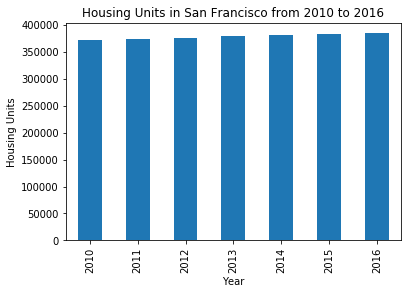

In [550]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

sfo_housing_plot = sfo_housing_avg.plot(
        kind='bar', 
        legend=None,
        title='Housing Units in San Francisco from 2010 to 2016').set(xlabel='Year',
        ylabel='Housing Units'
)

sfo_housing_plot

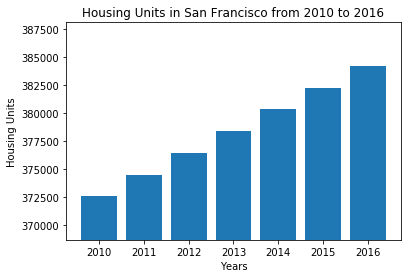

In [551]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
        
sfo_housing_avg.reset_index(inplace=True)

housing_std = np.std(sfo_housing_avg['housing_units'])
mx = max(sfo_housing_avg['housing_units']) + housing_std
mn = min(sfo_housing_avg['housing_units']) - housing_std

plt.figure();

x = sfo_housing_avg['year']
y = sfo_housing_avg['housing_units']
    
plt.bar(x, y)
plt.ylabel('Housing Units')
plt.xlabel('Years')
plt.ylim(mn, mx)
plt.title('Housing Units in San Francisco from 2010 to 2016')

plt.show()

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [509]:
# Calculate the average gross rent and average sale price per square foot
sfo_sq_price_rent = sfo_data.groupby(['year']).mean()\
    .drop(columns=['housing_units'])

sfo_sq_price_rent

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

In [525]:
# Plot the Average Gross Rent per Year as a Line Chart 

#hvPlot:

rent_std = np.std(sfo_sq_price_rent['gross_rent'])
rent_max = max(sfo_sq_price_rent['gross_rent']) + rent_std
rent_min = min(sfo_sq_price_rent['gross_rent']) - rent_std

sfo_rent = sfo_sq_price_rent['gross_rent'].hvplot(
            ylim=(rent_min, rent_max),
            xlabel='Year', 
            ylabel='Gross Rent',
            width=500,
            title='Average Gross Rent in San Francisco')
sfo_rent

:Curve   [year]   (gross_rent)

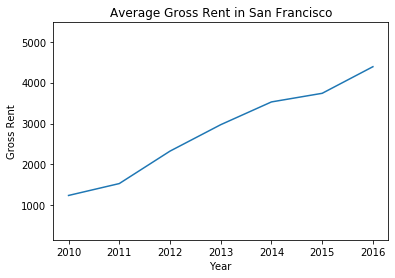

In [526]:
#PyPlot:

plt.figure()

rental_df = sfo_sq_price_rent.reset_index().drop(columns='sale_price_sqr_foot')

rent_std = np.std(rental_df['gross_rent'])
rent_max = max(rental_df['gross_rent']) + rent_std
rent_min = min(rental_df['gross_rent']) - rent_std

rent_x = rental_df['year']
rent_y = rental_df['gross_rent']

plt.plot(rent_x, rent_y)

plt.xlabel('Year')
plt.ylabel('Gross Rent')
plt.title('Average Gross Rent in San Francisco')
plt.ylim(rent_min, rent_max)

plt.show()

### Average Sales Price per Year

In [529]:
# Plot the Average Sales Price per Year as a line chart

#hvPlot:

sale_std = np.std(sfo_sq_price_rent['sale_price_sqr_foot'])
sale_max = max(sfo_sq_price_rent['sale_price_sqr_foot']) + sale_std
sale_min = min(sfo_sq_price_rent['sale_price_sqr_foot']) - sale_std

sfo_sale_price = sfo_sq_price_rent['sale_price_sqr_foot'].hvplot(
            ylim=(sale_min, sale_max),
            xlabel='Year', 
            ylabel='Avg. Sales Price',
            width=500,
            title='Average Sale Price per Square Foot in San Fransisco')

sfo_sale_price

:Curve   [year]   (sale_price_sqr_foot)

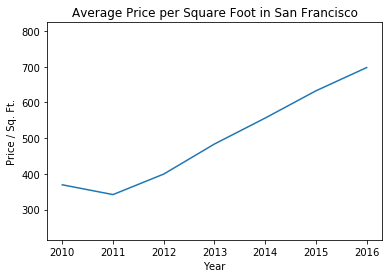

In [533]:
#PyPlot:

plt.figure()

sales_df = sfo_sq_price_rent.reset_index().drop(columns='gross_rent')

sales_std = np.std(sales_df['sale_price_sqr_foot'])
sales_max = max(sales_df['sale_price_sqr_foot']) + sales_std
sales_min = min(sales_df['sale_price_sqr_foot']) - sales_std
    
sales_x = sales_df['year']
sales_y = sales_df['sale_price_sqr_foot']
    
plt.plot(sales_x, sales_y)
    
plt.xlabel('Year')
plt.ylabel('Price / Sq. Ft.')
plt.title('Average Price per Square Foot in San Francisco')
plt.ylim(sales_min, sales_max)
    
plt.show()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [534]:
# Group by year and neighborhood and then create a new dataframe of the mean values
year_nbhd = sfo_data.groupby(['neighborhood','year']).mean()
year_nbhd.head()

sale_price_sqr_foot  housing_units  gross_rent
neighborhood year                                                
Alamo Square 2010           291.182945         372560        1239
             2011           272.527310         374507        1530
             2012           183.099317         376454        2324
             2013           387.794144         378401        2971
             2014           484.443552         380348        3528

In [538]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

def choose_neighborhood(neighborhood):  
    
    nbhd_prices = year_nbhd['sale_price_sqr_foot'].dropna()
    
    neighborhood_prices = nbhd_prices.loc[neighborhood]   
    neighborhood_std = np.std(neighborhood_prices)
    years = neighborhood_prices.reset_index()['year']
    
    if len(years) > 1:
        min_year = min(years)
        max_year = max(years)
        year_ticks = list(years)
        
        for x in year_ticks:
            if x+1 not in year_ticks and x != max(year_ticks):
                year_ticks.append(x+1)
        
        year_ticks.sort()
        
        mx_y = max(neighborhood_prices) + neighborhood_std
        
        nbhd_plot = neighborhood_prices.hvplot(
            x='year')\
                .opts(xlim=(min_year,max_year), 
                ylim=(0, mx_y), 
                xticks=year_ticks, 
                xlabel='Year', 
                title=f'{neighborhood}: Sale Price per Square Foot', 
                width=600, 
                ylabel='Price / Sq. Ft. (USD)'
                     )      
    else:
        min_year = 2010
        max_year = 2016
        year_ticks = list([min_year, max_year])
        
        for x in year_ticks:
            if x+1 not in year_ticks and x != max(year_ticks):
                year_ticks.append(x+1)
                
        year_ticks.sort()
        
        mx_y = max(neighborhood_prices) + (max(neighborhood_prices) / 2)
        
        nbhd_plot = neighborhood_prices.hvplot(
            kind='scatter', 
            x='year')\
                .opts(xlim=(min_year,max_year), 
                ylim=(0, mx_y), 
                xticks=year_ticks, 
                xlabel='Year', 
                title=f'{neighborhood}: Sale Price per Square Foot', 
                width=600, 
                ylabel='Price / Sq. Ft. (USD)'
                     )
    
    return nbhd_plot

In [539]:
neighborhood_list = year_nbhd.index.get_level_values(0).drop_duplicates()

In [540]:
# Render plot with Panel interactive widget
interact(choose_neighborhood, neighborhood=neighborhood_list)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive12674')

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [541]:
# Getting the data from the top 10 expensive neighborhoods
top_10_neighborhoods = sfo_data.groupby(['neighborhood'])\
        .mean().sort_values(by='sale_price_sqr_foot',ascending=False).head(10)

top_10_neighborhoods['sale_price_sqr_foot'] = top_10_neighborhoods\
        ['sale_price_sqr_foot'].round(2)

top_10_neighborhoods['gross_rent'] = top_10_neighborhoods['gross_rent'].round(2)

top_10_neighborhoods

sale_price_sqr_foot  housing_units  gross_rent
neighborhood                                                         
Union Square District               903.99      377427.50     2555.17
Merced Heights                      788.84      380348.00     3414.00
Miraloma Park                       779.81      375967.25     2155.25
Pacific Heights                     689.56      378401.00     2817.29
Westwood Park                       687.09      382295.00     3959.00
Telegraph Hill                      676.51      378401.00     2817.29
Presidio Heights                    675.35      378401.00     2817.29
Cow Hollow                          665.96      378401.00     2817.29
Potrero Hill                        662.01      378401.00     2817.29
South Beach                         650.12      375805.00     2099.00

In [542]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_plot = top_10_neighborhoods['sale_price_sqr_foot'].hvplot.bar( 
            ylim=(0,1000), 
            height=350,
            width=500,
            rot=45, 
            xlabel='Neighborhood', 
            ylabel='Sale Price / Sq. Ft.', 
            title='Top 10 Most Expensive Neighborhoods in San Fransisco')

top_10_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

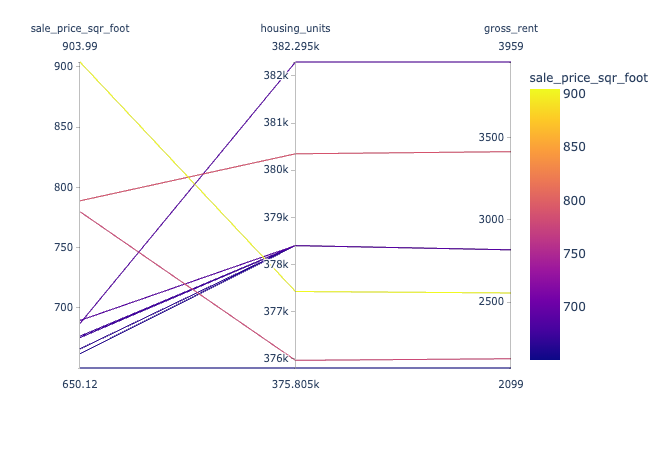

In [543]:
# Parallel Coordinates Plot
px.parallel_coordinates(top_10_neighborhoods, color='sale_price_sqr_foot')

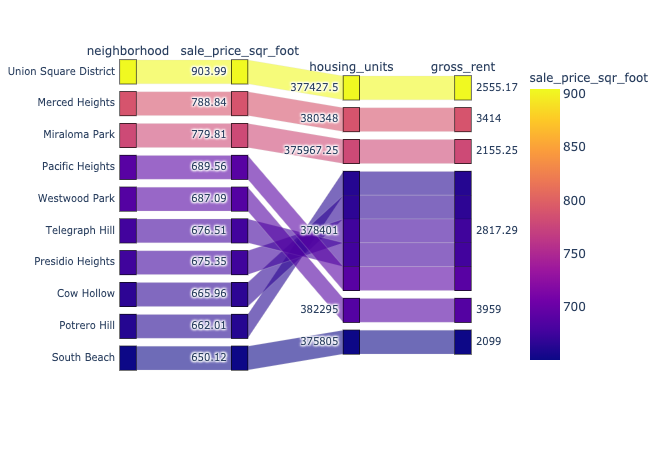

In [544]:
# Parallel Categories Plot
top_10_par_cat = top_10_neighborhoods.reset_index()
px.parallel_categories(top_10_par_cat, color='sale_price_sqr_foot')

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [545]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [546]:
# Calculate the mean values for each neighborhood
sfo_mean = sfo_data.groupby(['neighborhood']).mean().reset_index()\
                    .rename(columns={'neighborhood':'Neighborhood'})

sfo_mean['sale_price_sqr_foot'] = sfo_mean['sale_price_sqr_foot'].round(2)
sfo_mean['gross_rent'] = sfo_mean['gross_rent'].round(2)

sfo_mean.head()

Neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0     Alamo Square               366.02       378401.0     2817.29
1       Anza Vista               373.38       379050.0     3031.83
2          Bayview               204.59       376454.0     2318.40
3  Bayview Heights               590.79       382295.0     3739.00
4  Bernal Heights                576.75       379374.5     3080.33

In [547]:
# Join the average values with the neighborhood locations
combined_sfo_df = pd.concat([df_neighborhood_locations, 
           sfo_mean.drop(columns='Neighborhood')], axis='columns')

combined_sfo_df.head()

Neighborhood        Lat         Lon  sale_price_sqr_foot  housing_units  \
0     Alamo Square  37.791012 -122.402100               366.02       378401.0   
1       Anza Vista  37.779598 -122.443451               373.38       379050.0   
2          Bayview  37.734670 -122.401060               204.59       376454.0   
3  Bayview Heights  37.728740 -122.410980               590.79       382295.0   
4   Bernal Heights  37.728630 -122.443050               576.75       379374.5   

   gross_rent  
0     2817.29  
1     3031.83  
2     2318.40  
3     3739.00  
4     3080.33

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

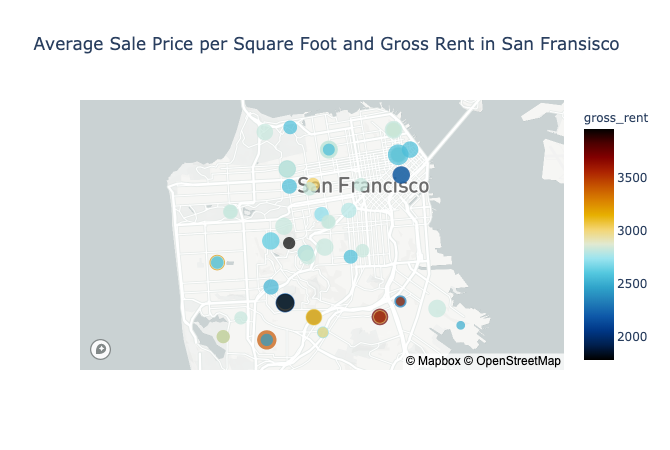

In [548]:
px.scatter_mapbox(combined_sfo_df, 
        lat='Lat', 
        lon='Lon', 
        color='gross_rent', 
        size='sale_price_sqr_foot', 
        zoom=10.5, 
        title='Average Sale Price per Square Foot and Gross Rent in San Fransisco',
        color_continuous_scale=px.colors.cyclical.IceFire, 
        size_max=15
)